In [1]:
# Import Dependencies
import pandas as pd
import csv
import numpy as np
import requests
import json
#from config import gkey

In [2]:
# Set File path for original Data Set
shark_attack_csv = 'data_files/attacks.csv'

In [3]:
# Read CSV into a Data Frame
shark_df = pd.read_csv(shark_attack_csv, encoding='iso-8859-1')

In [5]:
#View Sample
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


# Date 

In [19]:
shark_df["Date"] = shark_df["Date"].replace({"06-26-1890": "26-Jun-1890"})
shark_df["Date"] = shark_df["Date"].replace({"2017.06.05": "05-Jun-2017"})
shark_df["Date"] = shark_df["Date"].replace({"1950.07.19": "19-Jul-1950"})
shark_df["Date"] = shark_df["Date"].replace({"09-Jul-2006.": "09-Jul-2006"})
shark_df["Date"] = shark_df["Date"].replace({"2008.01.30": "30-Jan-2008"})
shark_df["Date"] = shark_df["Date"].replace({"19-Jul-2007.b": "19-Jul-2007"})
shark_df["Date"] = shark_df["Date"].replace({"19-Jul-2007.a": "19-Jul-2007"})
shark_df["Date"] = shark_df["Date"].replace({"26-Jul-1975.b": "26-Jul-1975"})
shark_df["Date"] = shark_df["Date"].replace({"1844.07.16.R": "16-Jul-1844"})
shark_df["Date"] = shark_df["Date"].replace({"1836.07.26.R": "26-Jul-1836"})
shark_df["Date"] = shark_df["Date"].replace({"1898.01.24": "24-Jan-1898"})
shark_df["Date"] = shark_df["Date"].replace({"1951.12.15.R": "15-Dec-1951"})

In [20]:
#extract data only with the format day-month-year
shark_df['Cleaned_Date_1']=shark_df['Date'].str.extract(r'(\d+-[\w]+-\d+)')
#extract date only with the format month-year
shark_df['Cleaned_Date_2']=shark_df['Date'].str.extract(r'(^[A-Za-z]+-\d+)')
#extract date with the format day-month
shark_df['Cleaned_Date_3']=shark_df['Date'].str.extract(r'(^[\d]+-[A-Za-z]+$)')

#extract day
shark_df['Day_1']=shark_df['Cleaned_Date_1'].str.extract(r'(\d+)')
shark_df['Day_2']=shark_df['Cleaned_Date_3'].str.extract(r'(\d+)')
shark_df['Day_1']=shark_df['Day_1'].fillna('')
shark_df['Day_2']=shark_df['Day_2'].fillna('')
shark_df['Day']=shark_df['Day_1'].astype(str)+shark_df['Day_2'].astype(str)

#extract month
shark_df['Month_1']=shark_df['Cleaned_Date_1'].str.extract(r'(-\w+-)')
shark_df['Month_1']=shark_df['Month_1'].str.replace('-','')

shark_df['Month_2']=shark_df['Cleaned_Date_2'].str.extract(r'(\w+)')

shark_df['Month_3']=shark_df['Cleaned_Date_3'].str.extract(r'(-\w+)')
shark_df['Month_3']=shark_df['Month_3'].str.replace('-','')

shark_df['Month_1']=shark_df['Month_1'].fillna('')
shark_df['Month_2']=shark_df['Month_2'].fillna('')
shark_df['Month_3']=shark_df['Month_3'].fillna('')

shark_df['Month']=shark_df['Month_1'].astype(str)+shark_df['Month_2'].astype(str)+shark_df['Month_3'].astype(str)

In [21]:
del shark_df['Cleaned_Date_1']
del shark_df['Cleaned_Date_2']
del shark_df['Cleaned_Date_3']
del shark_df['Day_1']
del shark_df['Day_2']
del shark_df['Month_1']
del shark_df['Month_2']
del shark_df['Month_3']

In [22]:
shark_df['Month']=shark_df['Month'].replace('', np.nan)
shark_df['Day']=shark_df['Day'].replace('', np.nan)

## Year

In [23]:
shark_df['Year'] = shark_df['Year'].fillna(0)
shark_df['Year'] = shark_df['Year'].astype(int)
shark_df=shark_df[shark_df['Year']>1959]

## Month

In [25]:
shark_df["Month"] = shark_df["Month"].replace({"Ap": "Apr"})

## Day

In [29]:
shark_df["Day"] = shark_df["Day"].replace({"01": "1"})
shark_df["Day"] = shark_df["Day"].replace({"02": "2"})
shark_df["Day"] = shark_df["Day"].replace({"03": "3"})
shark_df["Day"] = shark_df["Day"].replace({"04": "4"})
shark_df["Day"] = shark_df["Day"].replace({"05": "5"})
shark_df["Day"] = shark_df["Day"].replace({"06": "6"})
shark_df["Day"] = shark_df["Day"].replace({"07": "7"})
shark_df["Day"] = shark_df["Day"].replace({"08": "8"})
shark_df["Day"] = shark_df["Day"].replace({"09": "9"})

In [6]:
# Removes two unneccessary columns
del shark_df['Unnamed: 22']
del shark_df['Unnamed: 23']
del shark_df['Case Number']
del shark_df['Investigator or Source']
del shark_df['href formula']
del shark_df['href']
del shark_df['Case Number.1']
del shark_df['Case Number.2']
del shark_df['original order']
del shark_df['pdf']
del shark_df['Name']

In [7]:
# Update columns that have extra spaces
shark_df = shark_df.rename(columns={"Sex ": "Sex", "Species ": "Species"})

In [8]:
# Update blank cells in columns to "Unknown" instead of dropping those rows
shark_df['Species'] = shark_df['Species'].replace({np.nan: 'Non-Disclosed'})
shark_df["Sex"] = shark_df["Sex"].replace({np.nan: "Non-Disclosed"})

In [9]:
# Standard values in column "Fatal (Y/N)"
shark_df["Fatal (Y/N)"] = shark_df["Fatal (Y/N)"].replace({np.nan: "Uncomfirmed", "UNKNOWN": "Uncomfirmed", " N": "N", 
                                                           "2017": "Uncomfirmed", "M": "Uncomfirmed", "N ": "N", "y": "Y"})

# Activity 

In [12]:
# Cleanup and standardize Activity Values
shark_df["Activity"] = shark_df["Activity"].replace({np.nan: "UNKNOWN", "PADDLING": "BOARDING", "FREE DIVING": "DIVING", "KITE SURFING": "SURFING", "WALKING": "SWIMMING","BODY BOARDING": "SURFING", "WINDSURFING": "SURFING", "STAND-UP PADDLEBOARDING": "BOARDING", "WADING":"SWIMMING","KAYAK FISHING FOR SHARKS": "BOATING", "CLEANING FISH": "OTHER", "SNORKELING": "SWIMMING", "SPEARFISHING": "FISHING", "FISHING / WADING": "FISHING", "2 BOATS CAPSIZED": "SHIPWRECK", "NIGHT BATHING":"SWIMMING","KAYAKING / FISHING": "BOATING", "BODY SURFING":"SURFING", "SWIMMING, POACHING ABALONE": "SWIMMING", "CANOEING": "SWIMMING", "SUP": "BOARDING", "SKIMBOARDING": "BOARDING", "FISHING ": "FISHING", "TOUCHING A SHARK": "OTHER", "ATTEMPTING TO LASSO A SHARK": "OTHER", "PHOTO SHOOT": "OTHER", "PADDLE BOARDING": "BOARDING", "KAKAYING": "BOATING", "WASHING HANDS": "OTHER", "GRABBING SHARK FOR A SELFIE": "OTHER","KAYAK FISHING": "BOATING", "TAGGING SHARKS": "OTHER", "SURF SKIING ": "BOATING", "SURF FISHING": "FISHING", "FLOATING":"SWIMMING", "CAGE DIVING": "DIVING", "SURFNG": "SURFING", "SUP FOIL BOARDING": "BOARDING", "LOBSTERING": "FISHING", 
                                                     "FISHING IN ALABAMA DEEP FISHING RODEO": "FISHING", "FISHING FOR SQUID": "FISHING", "FISHING FOR SHARKS": "FISHING", "FLOATING IN TUBE": "SWIMMING", "TEASING A SHARK": "OTHER", "SURF-SKIING": "BOATING", "DIVING FOR BECHE-DE-MER": "DIVING","FEEDING STINGRAYS?": "OTHER", "SURFING ": "SURFING", "SEA DISASTER": "OTHER", "KAYAKING": "BOATING", "LOBSTER FISHING": "FISHING", "SWIMMING / WADING": "SWIMMING", "FISHING FOR SHRIMP": "FISHING", "PHOTOGRAPHING FISH": "OTHER", "SCALLOP DIVING ON HOOKAH": "DIVING", "TREADING WATER": "SWIMMING", "BODY BOARDING ": "BOARDING", "PLAYING IN THE WATER": "SWIMMING", "BODY SURFING?": "SURFING", "PLAYING": "SWIMMING", "ATTEMPTING TO RESCUE A SHARK": "OTHER", "PHOTOGRAPHING THE SHARK": "OTHER", "STANDING / SNORKELING": "SWIMMING", "HAND FEEDING SHARKS": "OTHER", "SITTING IN THE WATER": "SWIMMING", "TRANSATLANTIC ROWING": "BOATING", "BODYSURFING": "SURFING", "ROWING": "BOATING", "SHARK FISHING": "FISHING", "SURFING & FILMING DOLPHINS": "SURFING", "FILMING": "OTHER", "SWIMMING AFTER FALLING OVERBOARD": "SWIMMING",
                                                     "DIVING / FILMING": "DIVING", "FISHING FOR BLUE SHARKS": "FISHING", "STANDING IN INNER TUBE": "SWIMMING", "BODY SURFING OR BOOGIE BOARDING": "SURFING", "KAYAKING ": "BOATING", "FEEDING FISH": "OTHER", "PLAYING WITH AN AIR MATTRESS": "OTHER", "KITE BOARDING": "BOARDING", "SHARK DIVING": "DIVING", "PETTING A SHARK": "OTHER", "KNEELING IN THE WATER": "SWIMMING", "FELL INTO THE WATER": "OTHER", "SHARK WATCHING": "OTHER", "DIVING FOR LOBSTERS": "DIVING", "SCUBA DIVING / CULLING LIONFISH": "DIVING", "KITESURFING": "SURFING", "SAILING": "BOATING", "SPEARFISHING / FREE DIVING": "FISHING", "FREE DIVING / PHOTOGRAPHING PILOT WHALES": "DIVING", "FILMING A DOCUMENTARY": "OTHER", "ATTEMPTING TO REMOVE FISHING NET FROM SUBMERGED OBJECT": "OTHER", "KITEBOARDING": "BOARDING", "DIVING FOR CRAYFISH": "DIVING", "DIVING ": "DIVING", "SWIMMING / SNORKELING": "SWIMMING", "DIVING FOR ABALONE": "DIVING", "CASTING A NET": "FISHING", "MARATHON SWIMMING": "SWIMMING", "LONGLINE FISHING FOR SHARKS": "FISHING", "WRANGLING A SHARK": "OTHER", "ATTEMPTING TO FREE THE SHARK": "OTHER",
                                                     "WALKING IN SURF": "SWIMMING", "SWIMMING ": "SWIMMING", "SWIMMING & SNORKELING": "SWIMMING", "PLAYING IN THE SURF": "SWIMMING", "FLY FISHING": "FISHING", "FISHING - 'TAG & RELEASE'": "FISHING", "SWIMMING TO SHORE WITH FLOATIOON DEVICES AFTER BOAT ENGINE CONKED OUT": "SWIMMING", "DRAGGING STRANDED SHARK INTO DEEPER WATER": "SWIMMING", "BATHING": "SWIMMING", "BODYBOARDING": "SURFING", "SWIMMING OR BOOGIE BOARDING": "SWIMMING", "WADING OR SWIMMING": "SWIMMING", "FREE DIVING ": "DIVING", "ATTEMPTING TO RESCUE AN INJURED & BEACHED SHARK": "OTHER", "FREE DIVING / SPEARFISHING": "FISHING", "CRAYFISHING": "FISHING", "DIVING, FEEDING SHARKS": "DIVING", "ATTEMPTING TO KITE SURF FROM EGYPT TO SAUDI ARABIA": "SURFING", "FISHING (ILLEGALLY)": "FISHING", "DIVING, PHOTOGRAPHING SHARKS": "DIVING", "WADE FISHING": "FISHING", "JUMPING IN THE WAVES": "SWIMMING", "STANDING, COLLECTING SEA STARS": "SWIMMING", "FLOATING ": "SWIMMING", "SWIMMING OR SNORKELING": "SWIMMING", "KAYAKING OR WAVE SKIING": "BOATING", "JET SKIING": "BOATING", "STANDING OR BOOGIE BOARDIN": "BOARDING", 
                                                     "WASHING SAND OFF A SPEARED FISH": "OTHER", "STANDING, HOLDING SHARK PUP": "OTHER", "DIVING / FISHING": "DIVING", "WAKEBOARDING": "BOARDING", "SHARK FISHING ON THE RICARDO ASTORGA": "FISHING", "SHARK FISHING ON THE DON AGUSTÍN-VI. ": "FISHING", "ATTEMPTING TO FIX MOTOR": "OTHER", "SWIMMING /  WHALE WATCHING": "SWIMMING", "SWIMMING AFTER BOAT BECAME DISABLED": "SWIMMING", "RESCUING": "OTHER", "MEASURING SHARKS": "OTHER", "SWIMMING / TREADING WATER": "SWIMMING", "SURF FISHING / WADING": "FISHING", "SPEARFISHING (FREE DIVING)": "FISHING", "PADDLING ON KNEEBOARD": "BOARDING", "SWIMMING TO SHORE FROM CAPSIZED KAYAK": "SWIMMING", "PADDLE-BOARDING": "BOARDING", "SWIMMING, ATTEMPTING TO RESCUE A GIRL  BELIEVED TO BE DROWNING": "SWIMMING", "WASHING HIS FEET": "SWIMMING", "PADDLE-SURFING": "SURFING", "CRAWLING": "SWIMMING", "DIVING, BUT ON THE SURFACE WHEN BITTEN BY THE SHARK": "DIVING", "AIR DISASTER": "OTHER", "CRABBING": "FISHING", "YACHT RACE": "BOATING", "SINKING OF THE CARGO SHIP MARK JASON": "SHIPWRECK", "FISHING BOAT SWAMPED IN STORM": "SHIPWRECK", 
                                                     "SWIMMING, TOWING SURFBOARD": "SWIMMING", "SWIMMING OR SURFING": "SWIMMING", "ROWING AN INFLATABLE DINGHY": "BOATING", "NIGHT DIVING": "DIVING", "FREE-DIVING": "DIVING", "WALKING OUT OF THE WATER AFTER SURFING": "SWIMMING", "FISHING FROM SURFSKI": "FISHING", "ACCIDENTALLY STOOD ON HOOKED SHARK'S TAIL BEFORE ATTEMPTING TO GUT IT ": "OTHER", "ATTEMPTING TO CHASE SHARK OUT TO SEA": "OTHER", "FISHING FOR SNAPPER": "FISHING", "REMOVING FISH FROM A TRAP": "FISHING", "THE 426-TON CARGO SHIP MIA, LADEN WITH CEMENT, CAPSIZED IN HEAVY SEAS ": "SHIPWRECK", "WADING?": "SWIMMING", "JUMPING": "SWIMMING", "FLOATING NEAR BOAT & OBSERVING BIOLUMINESCE": "SWIMMING", "JUMPED INTO THE WATER": "SWIMMING", "SURF PADDLING": "SURFING", "MURDER": "OTHER", "REMOVING HOOK FROM SHARK": "OTHER", "REVIVING A SEDATED SHARK": "OTHER", "SHARK TAGGING": "OTHER", "SWIMMING / JUMPING OFF A JETTY": "SWIMMING", "PLAYING ON A SANDBAR": "SWIMMING", "SHRIMPING": "FISHING", "SWIMMING / BODY SURFING": "SWIMMING", "PLAYING SOCCER IN THE WATER": "SWIMMING", "FREE DIVING / MODELING": "DIVING", 
                                                     "DIVING / KISSING THE SHARK": "DIVING", "LIFESAVING DRILL": "OTHER", "TOUCHING SHARKS": "OTHER", "COMPETING IN THE WOODVALE ATLANTIC ROWING RACE": "BOATING", "NIGHT SURFING": "SURFING", "STANDING / SURFING": "SURFING", "TREADING WATER/ SURFING": "SURFING", "REMOVING SHARK FROM NET": "OTHER", "BOOGIE BOARDING, KICKED AT OBJECT IN THE WATER": "BOARDING", "SCUBA DIVING IN AQUARIUM TANK": "DIVING", "HOLDING ONTO AN INFLATABLE BOAT": "SWIMMING", "SWIMMING WITH BOOGIE BOARD": "SWIMMING", "CROUCHING IN 2' OF WATER": "SWIMMING", "DIVING IN AQUARIUM DISPLAY TANK": "DIVING", "ATTEMPTING TO DRIVE SHARK AWAY FROM SAILING REGATTA": "OTHER", "FISHING FROM A KAYAK": "FISHING", "SWEPT OUT TO SEA BY THE TSUNAMI, SHE CLUNG  TO A LOG FOR 24 HOURS": "OTHER", "SCURFING (SURFBOARD BEING  TOWED BEHIND A BOAT)": "SURFING", "CHUMMING FOR WHITE SHARKS": "FISHING", "SPEARFISHING/ FILMING": "FISHING", "DIVING & FISHING WITH NET": "DIVING", "WADING / FISHING & CARRYING A BAG OF FISH": "FISHING", "FISHING FOR SQUID ABOARD THE TRAWLER SHIKISHIMA-MARU WHEN THE SHARK LEAPT INTO THE BOAT": "FISHING",
                                                     "IN WATER WITH DIVING SEABIRDS": "SWIMMING", "SWIMMING, POACHING PERLEMOEN": "SWIMMING", "BOOGIE-BOARDING / SWIMMING": "BOARDING", "FREE DIVING & SPEARFISHING": "DIVING", "TANDEM SURFING": "SURFING", "FIVE MEN ON MAKESHIFT RAFT AFTER THEIR 10 M FISHING BOAT  CAPSIZED AND SANK IN ROUGH SEAS. SURVIVORS RESCUED AFTER  7.5 HOURS IN THE WATER": "SHIPWRECK", "SURF SKIING": "BOATING", "KAYAKING (RETURNING FROM SPEARFISHING)": "BOATING", "AIR DISASTER. FLASH AIRLINES BOEING 737 CRASHED INTO THE RED SEA": "OTHER", "SWIMMING / SHIPWRECK": "SHIPWRECK", "SURFING AMID A SHOAL OF SHARKS": "SURFING", "SWIMMING TO SHORE FROM BOAT OR KAYAK": "SWIMMING", "SITTING ON SURFBOARD": "SURFING", "WADING NEAR A FISHING NET": "SWIMMING", "WADING TO SHORE FROM HIS BOAT": "SWIMMING", "STANDING, STEPPED ON SHARK": "SWIMMING", "WADE-FISHING": "FISHING", "SWIMMING, WEARING BLACK WETSUIT & SWIM FINS": "SWIMMING", "WALKING, CARRYING SURFBOARD & STEPPED ON SHARK": "SWIMMING", "SWIMMING WITH POD OF DOLPHINS": "SWIMMING", "KILLING  SHARKS": "OTHER", "SWIMMING (USING A FLOAT)": "SWIMMING",
                                                     "PETTING CAPTIVE SHARKS": "OTHER", "FISHING, STANDING IN 2' OF WATER": "FISHING", "FISHING FROM SURFBOARD": "FISHING", "BOOGIE BOARDING OR SURFING": "BOARDING", "WADING, WHEN HE STEPPED ON THE SHARK": "SWIMMING", "ATTEMPTING TO RETREIVE A DINGHY": "OTHER", "SNORKELING (FILMING THE SARDINE RUN)": "SWIMMING", "FLOATING ON A RAFT": "SWIMMING", "FISHING, REMOVING THE SHARK FROM HIS LINE": "FISHING", "PLAYING IN THE SURF WITH HIS 2 DOGS": "SWIMMING", "COLLECTING BECHE-DE-MER": "FISHING", "FISHING FROM PRAWN TRAWLER": "FISHING", "SCALLOP DIVING (USING SURFACE-SUPPLIED AIR & A POD) ": "DIVING", "FISHING (DROWNED 2-APR-2002)": "FISHING", "SURFING, BUT STANDING IN WATER ALONGSIDE BOARD": "SURFING", "BODY-BOARDING": "SURFING", "SWIMMING /  BOOGIE BOARDING": "SWIMMING", "CAPSIZED FISHING BOAT": "SHIPWRECK", "KITE-BOARDING": "BOARDING", "SURFING, FELL OFF SURFBOARD & STEPPED ON THE SHARK.": "SURFING", "WRECK / TECHNICAL DIVING": "SHIPWRECK", "WALKING IN SHALLOWS": "SWIMMING", "FELL OFF BANANA BOAT": "BOATING", "FLOATING FACE-DOWN IN KNEE-DEEP WATER": "SWIMMING", 
                                                     "HIKING ON THE BEACH": "OTHER", "SPEARFISHING, CARRYING HIS CATCH": "FISHING", "STANDING ALONGSIDE SURFBOARD": "SURFING", "BATIN": "UNKNOWN", "ATTEMPTING TO CATCH A CROCODILE": "OTHER", "SINKING OF THE 40' ESPERANZA OFF ST. MAARTIN WITH 36 REFUGEES ON BOARD": "SHIPWRECK", "FISHING FOR WHITING": "FISHING", "SWIMMING BACK FROM ANCHORED SAILBOAT": "SWIMMING", "DIVING FOR SEA URCHINS": "DIVING", "DIVING (SHELL MAINTENANCE)": "DIVING", "SHIPWRECKED": "SHIPWRECK", "FELL ONTO DEAD SHARK": "OTHER", "CONDUCTING RESEARCH": "OTHER", "SWIMMING OUT TO PORPOISES ": "SWIMMING", "WINDSURFING, BUT SITTING ON HIS BOARD": "SURFING", "SURFING / WADING": "SURFING", "ATTEMPTING TO ILLEGALLY ENTER THE USA": "OTHER", "SPEARFISHING, HOLDING MESH BAG WITH SPEARED FISH": "FISHING", "AIR DISASTER - PIPER AIRCRAFT CRASHED INTO THE SEA, KILLING ALL ON BOARD": "OTHER", "BOOGIE BOARDING / WADING": "BOARDING", "FEEDING PRAWNS TO CAPTIVE SHARKS": "OTHER", "CANOE WITH 3 MEN ONBOARD SANK": "SHIPWRECK", "FISHING FOR TARPON": "FISHING", "SURFING (SITTING ON HIS BOARD)": "SURFING", 
                                                     "SPEARFISHING, BUT SWIMMING AT SURFACE": "FISHING", "SURFING, LYING ON SURFBOARD": "SURFING", "WADING TO SHORE AFTER SURFING": "SWIMMING", "WADING WITH SURFBOARD": "SWIMMING", "LYING PRONE IN 2' OF WATER": "SWIMMING", "SPEARFISHING & HOLDING CATCH": "FISHING", "SWIMMING WITH DOLPHINS": "SWIMMING", "WADING IN SCHOOL OF BAITFISH": "SWIMMING", "ADRIFT IN A LIFE JACKET": "OTHER", "SPLASHING / WADING": "SWIMMING", "SWIMMING AFTER BEING SWEPT INTO SEA BY A LARGE WAVE": "SWIMMING", "SPEARFISHING & DIVING FOR PAUA": "FISHING", "SCIENTIFIC RESEARCH (DR. SONNY GRUBER'S STUDENT)": "OTHER", "SWIMMING, TOWING A KAYAK": "SWIMMING", "BODY SURFING OR BODY BOARDING": "SURFING", "SWIMMING NEAR POD OF WHALES": "SWIMMING", "CRUISING": "BOATING", "PADDLE SKIING": "BOARDING", "INFLATABLE BOAT": "BOATING", "SPLASHING": "SWIMMING", "FISHING FOR TUNA": "FISHING", "FISHING / WASHING BAIT OFF HANDS": "FISHING", "MOVING A SHARK IN A NET ": "OTHER", "SURFING (OR BODY BOARDING)": "SURFING", "FREE DIVING FOR ABALONE": "DIVING", "SWIMMING / SURFING": "SURFING", "TOWING RUBBER DINGHY": "OTHER", 
                                                     "SURFING (LYING PRONE ON HIS BOARD)": "SURFING", "SNORKELING  HUNTING CRAYFISH AND ABALONE": "SWIMMING", "SWIMMING OR PADDLE BOARDING": "BOARDING", "SPEARFISHING ON SCUBA & TRANSFERRING FISH ONTO A STRINGER": "FISHING", "SCUBA DIVING (SUBMERGED RIDING A SCOOTER)": "DIVING", "BODY BOARDING OR SURFING": "SURFING", "FISHINGAT": "FISHING", "WALKING / SURFING": "SURFING", "FLOATING ON RAFT": "SWIMMING", "WADING / SURFING": "SWIMMING", "FISHING FOR OCTOPUS": "FISHING", "SPEARFISHING / NIGHT DIVING": "FISHING", "BODY SURFING, STOOD UP ON SANDBAR": "SURFING", "ROWING ": "BOATING", "WATCHING SEALS": "OTHER", "ATTEMPTING TO ATTRACT DOLPHINS": "OTHER", "SURFING / SWIMMING": "SURFING", "FREE DIVING WITH A POD OF DOLPHINS": "DIVING", "TECH DIVING ": "DIVING", "SHELL DIVING": "DIVING", "SWIMMING BREAST STOKE": "SWIMMING", "FISHING IN KNEE-DEEP WATER": "FISHING", "DIVED NAKED INTO THE WATER ON A BET": "DIVING", "SWIMMING IN FISH TANK": "SWIMMING", "BOEING 757 ENROUTE FROM PORTA PLATA PLUNGED INTO THE SEA": "OTHER", "SWIMMING WITH MASK & SNORKEL": "SWIMMING", "CHUMMING FOR SHARKS": "FISHING", 
                                                     "DIVING, GATHERING SHELLFISH": "DIVING", "FELL OFF AIRCRAFT CARRIER": "OTHER", "PLAYING / STANDING": "SWIMMING", "ABALONE DIVING USING HOOKAH (NEAR CALVING WHALES)": "DIVING", "ABALONE DIVING USING HOOKAH (RESTING ON THE SURFACE)": "DIVING", "ON A FLOAT": "SWIMMING", '"RIDING WAVES ON A BOARD"': "BOARDING", "JUMPED OFF SURFBOARD & LANDED ON THE SHARK": "SURFING", "SCUBA DIVING (ASCENDING USING SCOOTER)": "DIVING", "PLAYING / JUMPING": "SWIMMING", "SLEEPING IN ANCHORED BOAT": "BOATING", "SCUBA DIVING FOR BIVALVES": "DIVING", "WIND SURFING": "SURFING", "SURFING, SITTING ON BOARD": "SURFING", "MURDER VICTIM": "OTHER", "COMMERCIAL DIVER (SUBMERGED OR TREADING WATER)": "DIVING", "SURFING, PADDLING SEAWARDS": "SURFING", "ADRIFT ON REFUGEE RAFT": "OTHER", "JUMPED OFF ROCKS INTO WHITE WATER": "OTHER", "FREEDIVING FOR SEASHELLS": "DIVING", "SWIMMING ALONGSIDE NOAA RESEARCH VESSEL DISCOVERER": "SWIMMING", "REMOVING SHARK FROM TANK IN NIGHTCLUB ": "OTHER", "SWIMMING, AFTER FALLING OFF TOWED KNEEBOARD": "SWIMMING", "PLAYING VOLLEYBALL WITH FRIENDS": "OTHER", "HOOKAH DIVING": "DIVING", 
                                                     "SURFING, PADDLING SHOREWARDS": "SURFING", "STAMDING": "SWIMMING", "WATCHING THE SHARK FEEDING ON A DEAD PINNIPED": "OTHER", "RIDING FLOATATION DEVICE": "SWIMMING", "FREE DIVING FOR ABALONE (ASCENDING)": "DIVING", "FISHING FOR LOBSTERS": "FISHING", "OYSTER FISHING": "FISHING", "PADDLING ON SURFBOARD OR BODY BOARD": "SURFING", "SCUBA DIVING AT SEAL COLONY": "DIVING", "FLOATING ON HIS BACK": "SWIMMING", "PADDLING ON SURFBOARD": "SURFING", "FREE DIVING & SPEARFISHING (ASCENDING)": "DIVING", "14 M PRAWN TRAWLER NEW VENTURE CAPSIZED  & SANK IN HEAVY SEAS THREE PEOPLE IN THE WATER": "SHIPWRECK", "16' CATAMARAN CAPSIZED PREVIOUS NIGHT, OCCUPANTS STAYED WITH WRECKAGE UNTIL MORNING, THEN ATTEMPTED TO SWIM ASHORE": "SHIPWRECK", "25-FOOT CABIN CRUISER HAPPY JACK SANK IN HEAVY SEAS": "SHIPWRECK", "3,909-TON PANAMANIAN FREIGHTER CHIEH LEE SANK IN A TYPHOON": "SHIPWRECK", "3.3 M FISHING BOAT SANK. TREVELUWE & PETER HODGSON (WEARING LIFEJACKETS) WERE DRIFTING IN THE CURRENT": "SHIPWRECK", "40' FISHING BOAT SANK": "SHIPWRECK", "63' FISHING BOAT SNO' BAY FOUNDERED": "SHIPWRECK", 
                                                     "A FATHER BATHING HIS SMALLEST DAUGHTER WHEN THE SHARK BUMPED HER OUT OF HIS ARMS AND CARRIED HER INTO DEEP WATER": "OTHER", "ABANDONING BURNING SHIP CAPTAIN GEORGE IN RAGING SEAS": "SHIPWRECK", "ADRIFT AFTER DITCHING PLANE IN THE SEA": "OTHER", "ADRIFT AFTER THE SINKING OF THE MOTOR YACHT PRINCESS DIANNE": "SHIPWRECK", "ADRIFT AFTER WAVE SWAMPED ENGINE": "SHIPWRECK", "AIR DISASTER: CRASH OF AIR FRANCE SUPER CONSTELLATION ": "OTHER", "AIRCRAFT CRASHED INTO SEA": "OTHER", "AIRCRAFT EXPLODED": "OTHER", "ANTI-SABOTAGE NIGHT DIVE EXERCISE ALONGSIDE DESTROYER (SCUBA DIVING)": "DIVING", "ARGENTINE AIR FORCE C-54": "OTHER", "ARSINOE, A FRENCH TANKER": "BOATING", "ATTACHING A LINE AT SEA": "FISHING", "ATTACKED SHARK WITH FISTS": "OTHER", "ATTEMPTED TO RETURN INJURED SHARK TO THE SEA": "OTHER", "ATTEMPTING TO ANESTHETIZE SHARK": "OTHER", "ATTEMPTING TO DRAG HOOKED SHARK ASHORE BY ITS TAIL": "FISHING", "ATTEMPTING TO DRIVE SHARK AWAY FROM THE BEACH": "OTHER", "ATTEMPTING TO LASSO SHARK'S TAIL": "OTHER", "ATTEMPTING TO SWIM ACROSS THE ATLANTIC OCEAN": "SWIMMING", "BATHER": "SWIMMING", 
                                                     "BEACH SEINE NETTING": "OTHER", "BEING PULLED TO SHORE FROM WRECK OF 25-TON FISHING VESSEL ALAN S": "SHIPWRECK", "BOARD SAILING": "BOARDING", "BOAT": "BOATING", "BOAT CAPSIZED BETWEEN O'AHU & MOLOKAI": "SHIPWRECK", "BOAT CAPSIZED?": "SHIPWRECK", "BOAT MISS BECKY  SANK 12 MILES FROM SHORE": "SHIPWRECK", "BOAT WITH 46 PEOPLE ON BOARD CAPSIZED": "SHIPWRECK", "BOAT, WITH 42 PASSENGERS ONBOARD, CAPSIZED IN ROUGH SEAS": "SHIPWRECK", "BODY SURFING ": "SURFING", "BOTTOM FISHING FOR LINGCOD & HAD HOOKED A FISH": "FISHING", "CANOE CAPSIZED WITH 10 OCCUPANTS, 8 SURVIVED,  HAMILTON SWAM OFF TO SEEK HELP": "SHIPWRECK", "CANOE SWAMPED, SWIMMING BACK TO CANOE": "BOATING", "CARGO SHIP DARA SANK AFTER COLLISION WITH ANOTHER SHIP DURING A SEVERE STORM": "SHIPWRECK", "CARGO SHIP EL GAMIL ENTROUTE SUEZ TO YEMEN (ADEN) WHEN HER CARGO SHIFTED AND SHE SANK. 19 EGYPTION SAILORS JUMPED INTO THE WATER AND SWAM FOR SEVERAL HOURS BEFORE BEING BITTEN BY SHARKS": "SHIPWRECK", "CATCHING SARDINES": "FISHING", "CATCHING SHARKS UNDER GOVERNMENT CONTRACT": "FISHING", "CHASING SHARK OUT OF BATHING AREA WHILE RIDING ON A SURF-SKI": "SURFING", 
                                                     "CHECKING FISH TRAPS, FELL INTO THE WATER": "FISHING", "CLAMMING": "FISHING", "CLEANING A TANK": "OTHER", "COLLECTING AQUARIUM SPECIMENS": "FISHING", "COLLECTING CRAYFISH": "FISHING", "COLLECTING DYNAMITED FISH": "FISHING", "COLLECTING FISH FROM NET": "FISHING", "COLLECTING MARINE SPECIMENS": "FISHING", "COLLECTING ORNAMENTAL FISH": "FISHING", "COLLECTING SHELLS": "OTHER", "COLOMBIAN  (AVIANCA) DC-4 AIRLINER PLUNGED INTO THE SEA 5 MINUTES AFTER TAKEOFF": "OTHER", "COMMERCIAL FISHING VESSEL, EV-NN, STRUCK OBJECT & SANK. KEN CROSBY AND  JAME & ANN DUMAS ADRIFT ON MAKESHIFT RAFT.": "SHIPWRECK", "COMMERCIAL SPEARFISHING": "FISHING", "COMPETING IN A LIGHT TACKLE GAME FISHING": "FISHING", "CONDUCTING A PROMOTIONAL FILM PROJECT FOR THE GEMINI SPACE PROGRAM (A PRACTICE ASTRONAUT RECOVERY)": "OTHER", "CRABBING (SPEARING CRABS)": "FISHING", "DANGLING FEET IN THE WATER": "OTHER", "DIVED FROM INNER-TUBE": "DIVING", "DIVING & FORCE-FEEDING THE SHARK": "DIVING", "DIVING / UW PHOTOGRAPHY": "DIVING", "DIVING FOR PEN SHELLS": "DIVING", "DIVING FOR SAND DOLLARS": "DIVING", 
                                                     "DIVING FOR SHELLS, SAW SHARK CIRCLING WIFE NEAR THE SURFACE, INTERCEPTED SHARK & IT PULLED HIM BENEATH THE WATER": "DIVING", "DIVING FOR SINKERS": "DIVING", "DIVING FOR TROCHUS SHELL": "DIVING", "DIVING IN SHARKEY'S REEF RESTAURANTS AQUARIUM": "DIVING", "DIVING IN TUNA NET": "DIVING", "DIVING INTO WATER": "DIVING", "DIVING TO UNTANGLE A CRAB TRAP LINE FROM BOAT'S PROPELLER": "DIVING", "DIVING, RETRIEVING FILM PACKAGE FROM TITAN 3C ROCKET": "DIVING", "DIVING. SHARK SWALLOWED HIS HAND, SO HE THREW HIS OTHER AROUND THE SHARK AND WENT SHARK-BACK RIDING FOR 30 YARDS UNTIL THE SHARK OPENED ITS JAWS": "DIVING", "DRIFT FISHING": "FISHING", "DROPPING ANCHOR": "OTHER", "DURING A SHARK FISHING TOURNAMENT, THE 18' BOATEM WAS CAPSIZED BY WAVES, THROWING 3 MEN INTO THE WATER ": "SHIPWRECK", "DYNAMITE FISHING": "FISHING", "EJECTED FROM F3H-2 AIRCRAFT ": "OTHER", "ESCAPING FROM ALACATRAZ": "OTHER", "EXERCISING HIS DOG IN THE SHALLOWS": "OTHER", "EXPLOSION DESTROYED 28' BOAT, SURVIVORS IN THE WATER ": "SHIPWRECK", "FEEDING A SHARK": "OTHER", "FELL FROM CLIFF WHILE FISHING & DISAPPEARED IN STRONG CURRENT": "OTHER", 
                                                     "FEEDING MULLET TO SHARKS": "OTHER", "FELL OFF SURFBOARD 20' FROM SHORE": "SURFING", "FELL OVERBOARD  FROM THE TAIWANESE FISHING TRAWLER LIEN CHENG FEU ": "OTHER", "FELL OVERBOARD, PROP SLASHED ARM": "OTHER", "FERRY BOAT DONA PAZ WITH 4431 PASSENGERS EXPLODED & CAUGHT FIRE WHEN SHE COLLIDED WITH AN  OIL TANKER ": "SHIPWRECK", "FERRY BOAT SANK": "SHIPWRECK", "FERRY CAPSIZED": "SHIPWRECK", "FILMING & FEEDING CAPTIVE SHARKS": "OTHER", "FILMING 5' BLUE SHARK": "OTHER", "FILMING UNDERWATER, CARRYING POWERHEAD": "OTHER", "FINNING THE SHARK": "OTHER", "FINNING THE SHARK THAT BIT HIM": "OTHER", "FISHERMAN": "FISHING", "FISHING & SPEARFISHING": "FISHING", "FISHING (BIG GAME)": "FISHING", "FISHING (ROD & LINE)": "FISHING", "FISHING (TROLLING)  FROM CANOE": "FISHING", "FISHING / STANDING IN WAIST DEEP WATER": "FISHING", "FISHING BOAT": "FISHING", "FISHING BOAT SWAMPED IN A STORM": "FISHING", "FISHING FOR ALBACORE": "FISHING", "FISHING FOR BOTTOM FISH": "FISHING", "FISHING FOR KOB": "FISHING", "FISHING FOR MACKEREL": "FISHING", "FISHING FOR PRAWNS": "FISHING", "FISHING FOR RED FISH": "FISHING",
                                                     "FISHING FOR ROCK LOBSTER": "FISHING", "FISHING FOR ROCK LOBSTERS": "FISHING", "FISHING FOR SNAPPERS & CLEANING MULLET. PUT MULLET OVER SIDE OF BOAT TO WASH IT": "FISHING", "FISHING FOR SNOEK & YELLOWTAIL": "FISHING", "FISHING FOR TURTLES": "FISHING", "FISHING FOR WHITE SHARK": "FISHING", "FISHING FOR YELLOWTAIL": "FISHING", "FISHING FOR YELLOWTAIL, SERIOLA QUINQUERADIATA": "FISHING", "FISHING FROM 34' BOAT WHEN PULLED OVERBOARD BY HOOKED SHARK": "FISHING", "FISHING FROM DINGHY": "FISHING", "FISHING FROM PADDLESKI": "FISHING", "FISHING FROM ROCKS, SWEPT OUT TO SEA BY LARGE WAVE & TREADING WATER": "FISHING", "FISHING IN SHOULDER-DEEP WATER": "FISHING", "FISHING INSIDE NET": "FISHING", "FISHING ON A BOAT": "FISHING", "FISHING WITH HAND LINE TIED TO WRIST & WAS PULLED INTO THE WATER": "FISHING", "FISHING WITH HAND NET IN 2' OF WATER": "FISHING", "FISHING, FELL FROM ROCKS & DISAPPEARED": "FISHING", "FISHING, HAULING IN A 5-LB SNAPPER": "FISHING", "FISHING, HAULING IN A SET LINE": "FISHING", "FISHING, HOOKED SHARK TOWED BOAT OUT TO SEA, STORM SWAMPED BOAT": "FISHING",
                                                     "FISHING, LIFTING SHARK OUT OF CRAYPOT": "FISHING", "FISHING, ON CHARTER BOAT SILVER DOLLAR": "FISHING", "FISHING, ON CHARTER BOAT SILVER DOLLAR": "FISHING", "FISHING, SLIPPED ON ROCKS & FELL INTO SEA": "FISHING", "FISHING, SPEARED SHARK UPSET CANOE & MAN FELL IN WATER": "FISHING", "FISHING, STEPPED ON HOOKED SHARK'S HEAD": "FISHING", "FISHING, STRUCK BY ANOTHER SHARK WHEN REMOVING SHARK FROM LINE": "FISHING", "FISHING, TOSSING NETTED SHARK ONBOARD": "FISHING", "FISHING, TRYING TO CATCH THE END OF HIS FISHING LINE": "FISHING", "FISHING, TWO LARGE SHARKS PASSED. HE SPEARED ONE AND IT BIT HIM": "FISHING", "FISHING, WHEN LINE BECAME SNAGGED ON ROCK & HE DIVED INTO WATER TO FREE IT ": "FISHING", "FLOATING IN INNER TUBE": "SWIMMING", "FLOATING ON A SMALL ORANGE RAFT ": "SWIMMING", "FLOATING ON AIR MATTRESS": "SWIMMING", "FLOATING ON AN INFLATABLE RAFT": "SWIMMING", "FLOATING ON BACK": "SWIMMING", "FLOATING ON HIS BACK IN AN INNER TUBE": "SWIMMING", "FLOATING ON INNER TUBE AFTER DIVING FOR LOBSTER": "SWIMMING", "FLOATING ON INNER TUBE RAFT": "SWIMMING", 
                                                     "FLOATING WITH LIFE PRESERVER AFTER HIS BOAT FOUNDERED": "SWIMMING", "FOUNDERING OF THE ISRAELI FREIGHTER MEZADA": "DIVING", "FREE DIVING  & SPEARFISHING (SUBMERGED)": "DIVING", "FREE DIVING & SPEARFISHING ": "DIVING", "FREE DIVING & SPEARFISHING (DESCENDING)": "DIVING", "FREE DIVING (BUT ON SURFACE)": "DIVING", "FREE DIVING , BUT SURFACING": "DIVING", "FREE DIVING / PHOTOGRAPHY, KNEELING ON SAND": "DIVING", "FREE DIVING / SPEARFISHING (RESTING ON THE SURFACE)": "DIVING", "FREE DIVING / SPEARFISHING, ": "DIVING", "FREE DIVING / SPEARFISHING, FROM PADDLEBOARD & FLOATING ON THE SURFACE": "DIVING", "FREE DIVING / SPEARFISHINGAT EDGE OF REEF": "DIVING", "FREE DIVING BUT TREADING WATER AT SURFACE": "DIVING", "FREE DIVING FOR ABALONE (SUBMERGED)": "DIVING", "FREE DIVING FOR ABALONE (SURFACING)": "DIVING", "FREE DIVING FOR ABALONE FROM ZODIAC (SUBMERGED)": "DIVING", "FREE DIVING FOR MOLLUSCS": "DIVING", "FREE DIVING FOR SCALLOPS": "DIVING", "FREE DIVING FOR SHELL": "DIVING", "FREE DIVING FOR TROCHUS": "DIVING", "FREE DIVING SPEARFISHING": "DIVING", 
                                                     "FREE DIVING WITH SEALS": "DIVING", "FREE DIVING, CARRYING SPEARGUN": "DIVING", "FREE DIVING, COLLECTING SHELLS": "DIVING", "FREE DIVING, HUNTING CRAYFISH": "DIVING", "FREE DIVING, SPEARFISHING": "DIVING", "FREE DIVING, SURVEYING A PIPELINE & EXAMING CATHODES UNDER JETTY": "DIVING", "FREEDIVING": "DIVING", "FREEDIVING FOR ABALONE (AT SURFACE)": "DIVING", "FREEDOM SWIMMING": "SWIMMING", "GAFFING NETTED SHARK": "OTHER", "GATHERING SHELLS": "SWIMMING", "GREEK STEAMSHIP LAKONIA CAUGHT FIRE, 98 OF HER 646 PASSENGERS, AND 30 OF HER CREW OF 376 PERISHED": "SHIPWRECK", "HAND LINING FOR SHAD": "OTHER", "HARD HAT DIVING": "DIVING", "HAULING DEAD SHARK ABOARD, WHEN ANOTHER SHARK LEAPT OUT OF THE WATER & BIT HIM": "OTHER", "HELPING ANGLER LAND A SHARK": "OTHER", "HELPING FRIEND LAND HOOKED SHARK": "FISHING", "HELPING MEN LAND A SHARK": "OTHER", "HOLDING SHARK ON LEADER & DANGLING IT ABOVE THE WATER": "OTHER", "HOOKAH DIVING (SUBMERGED)": "DIVING", "HOOKAH DIVING FOR ABALONE": "DIVING", "HOOKAH DIVING FOR ABALONE (DESCENDING)": "DIVING", "HOOKAH DIVING FOR ABALONE (SUBMERGED)": "DIVING", 
                                                     "HOOKAH DIVING FOR PEN SHELLS ": "DIVING", "HOOKAH DIVING FOR SEA URCHINS": "DIVING", "HUNTING CRAYFISH ": "FISHING", "IN WAIST-DEEP WATER": "SWIMMING", "INSPECTING TEETH OF SUPPOSEDLY DEAD (HOOKED & SHOT) SHARK": "OTHER", "INVESTIGATING SHARK SIGHTING": "OTHER", "JUMPED INTO THE WATER FROM A CLIFF": "SWIMMING", "KILLING A SHARK": "OTHER", "LEAVING THE WATER": "OTHER", "LIGHT AIRCRAFT DITCHED AT SEA": "OTHER", "LOBSTER DIVING USING SCUBA": "DIVING", "LONGLINE FISHING": "FISHING", "LYING ATOP SURFBOARD": "SURFING", "LYING IN 2 FEET OF WATER": "SWIMMING", "LYING IN 2 FEET OF WATER": "SWIMMING", "LYING ON SURFBOARD": "SURFING", "LYING ON SURFBOARD & PADDLING": "SURFING", "MOTOR BOAT REBEL BELLE LOST": "OTHER", "MOTOR LAUNCH BABY PRINCESA CAPSIZED WITH 22 PEOPLE ON BOARD": "SHIPWRECK", "MURDERED BY THAI PIRATES": "OTHER", "NET FISHING, PICKING CATCH FROM THE NET": "FISHING", "NETTING PILCHARDS": "FISHING", "NETTING SHARKS": "FISHING", "NSB MESHING": "OTHER", "OBSERVING A SHARK FEEDING ON A CARCASS OF A HUMPBACK WHALE": "OTHER", "OCEAN RACING": "OTHER", 'ON A "SHARK HUNT"': "OTHER",
                                                     "ON BOARD 51' FISHING VESSEL ONE KI": "OTHER", "ONBOARD 21' POWERBOAT THAT CAPSIZED IN ROUGH SEAS": "SHIPWRECK", "OVERCOME BY CO FUMES, FELL OVERBOARD FROM 36' FISHING CRUISER & PROP SLASHED ARM": "OTHER", "OVERTURNED SKIFF": "SHIPWRECK", "PACIFIC SEAFARER OF US NAVY": "OTHER", "PADDLESKIING": "BOATING", "PADDLING OUTRIGGER CANOE": "BOATING", "PADDLING RESCUE SKI": "BOATING", "PÊCHEUR DE BICHIQUES": "FISHING", "PHOTOGRAPHING SHARKS UNDERWATER USING SCUBA": "OTHER", "PICKING UP SHARK BY THE TAIL": "OTHER", "PLAYING ": "SWIMMING", "PLAYING IN KNEE-DEEP WATER": "SWIMMING", "PLAYING IN SURF WITH HIS CHILD  (9)": "SWIMMING", "PLAYING WITH A FRISBEE IN THE SHALLOWS": "SWIMMING", "PORTUGUESE AIRLINER WITH 9 PEOPLE ABOARD WENT DOWN. ": "OTHER",  "PREPARING TO FISH FOR JACK-MACKEREL": "FISHING", "PREPARING TO GO SKIN DIVING": "DIVING", "PULLING RAFT OUT TO RIDE TO SHORE": "SWIMMING", "PULLING SHARK FROM THE WATER": "OTHER", "PUSHED SURFMAT OF A YOUNG GIRL OUT OF THE SHARK'S PATH, DRAWING SHARK'S ATTENTION TO HIS OWN BOARD": "OTHER", "R5D AIRCRAFT WENT DOWN WITH 29 ON BOARD": "OTHER",
                                                     "RACING SKI": "BOATING", "RAN INTO THE WATER": "SWIMMING", "RESTING ON BODY BOARD": "BOARDING", "RESTING ON SURFBOARD": "BOARDING", "RETURNING TO SHORE, COLLIDED WITH SHARK": "SWIMMING", "ROLLED OFF RAFT": "SWIMMING", "S.S. MARINE SULPHUR QUEEN, LADEN WITH MOLTEN SULPHUR WAS BOUND FROM BEAUMONT, TEXAS FOR NORFOLK, VA, WHEN SHE DISAPPEARED WITH 39 ON BOARD": "SHIPWRECK", "S2F-1 AIRPLANE CRASHED IMMEDIATELY AFTER CARRIER TAKE-OFF": "OTHER", "SAILBOARDING, FELL INTO WATER 100 YARDS OUTSIDE THE BREAKWATER": "BOARDING", "SAILING ON CATAMARAN & FELL INTO THE WATER": "BOATING", "SCHOONER SANK DURING A STORM": "SHIPWRECK", "SCUBA DIVING ": "DIVING", "SCUBA DIVING & FEEDING FISH": "DIVING", "SCUBA DIVING & FILMING": "DIVING", "SCUBA DIVING & SPEARFISHING": "DIVING", "SCUBA DIVING & SPEARFISHING ": "DIVING", "SCUBA DIVING & U/W PHOTOGRAPHY": "DIVING", "SCUBA DIVING (BUT ON SURFACE)": "DIVING", "SCUBA DIVING (SUBMERGED)": "DIVING", "SCUBA DIVING FOR ABALONE": "DIVING", "SCUBA DIVING FOR ABALONE (AT SURFACE)": "DIVING", "SCUBA DIVING FOR LOBSTER (AT SURFACE)": "DIVING", 
                                                     "SCUBA DIVING FOR LOBSTERS": "DIVING", "SCUBA DIVING FOR SCALLOPS": "DIVING", "SCUBA DIVING, ATTEMPTING TO CATCH A CAPTIVE SHARK": "DIVING", "SCUBA DIVING, BUT SWIMMING ON SURFACE": "DIVING", "SCUBA DIVING, HAND FEEDING SHARKS": "DIVING", "SCUBA DIVING, REPORTEDLY ALSO SPEARFISHING": "DIVING", "SEA DISASTER SINKING OF FERRYBOAT CHRISTINA": "SHIPWRECK", "SEA DISASTER, FOUNDERING OF THE CARGO VESSLE M/V DOROLONDA": "SHIPWRECK", "SEARCHING FOR REMAINS OF  DR. MARAIS": "OTHER", "SEINING FOR BAIT, STANDING IN CHEST-DEEP WATER": "SWIMMING", "SETTING CRAYFISH POTS": "FISHING", "SIGHT-SEEING": "OTHER", "SINKING OF THE DREDGE WORLD ATLAS": "SHIPWRECK", "SINKING OF THE FERRYBOAT BONGBONG 1": "SHIPWRECK", "SINKING OF THE FERRYBOAT DON JUAN": "SHIPWRECK", "SINKING OF THE FERRYBOAT DUMAGUETE ": "SHIPWRECK", "SINKING OF THE M/V MINDORO DURING A TYPHOON": "SHIPWRECK", "SITTING": "SWIMMING", "SITTING IN BOW OF HER FATHER'S 5 M BOAT": "BOATING", "SITTING IN SHALLOWS": "SWIMMING", "SITTING ON GUNWALE OF BOAT": "BOATING", "SITTTING IN WATER WITH HIS CHILD": "SWIMMING",
                                                     "SKIN DIVING": "DIVING", "SKIN DIVING ": "DIVING", "SKINDIVING": "DIVING", "SKINDIVING FOR ABALONE (BUT AT SURFACE)": "DIVING", "SKINDIVING,": "DIVING", "SMALL BOAT WITH 2 MEN ONBOARD HIT A SUBMERGED CORAL FORMATION. MEN BEGAN SWIMMING TO SHORE": "SHIPWRECK", "SNORKELING ON SURFACE": "SWIMMING", "SNORKELING, CARRYING A SPEARED FISH IN HER HAND": "SWIMMING", "SNORKELING, POSSIBLY HOLDING A FISH": "SWIMMING", "SPEAR FISHING, REMOVING FISH FROM SPEAR": "FISHING", "SPEARED A GROUPER, SAW SHARK BUT IT CAME FOR HIM INSTEAD OF THE FISH SO HE FIRED SPEAR INTO SHARKS MOUTH. THEN SHARK TOOK GROUPER BUT UNABLE TO SWALLOW BECAUSE OF THE SPEAR IN ITS MOUTH.": "FISHING", "SPEARFISHING ": "FISHING", "SPEARFISHING / FREEDIVING": "FISHING", "SPEARFISHING / SCUBA DIVING": "FISHING", "SPEARFISHING / SCUBA DIVING (AT SURFACE)": "FISHING", "SPEARFISHING COMPETITION": "FISHING", "SPEARFISHING ON SCUBA": "FISHING", "SPEARFISHING USING SCUBA": "FISHING", "SPEARFISHING USING SCUBA & TRAILING A STRING OF BLEEDING FISH": "FISHING", "SPEARFISHING WITH SCUBA GEAR": "FISHING",
                                                     "SPEARFISHING, BUT STANDING IN KNEE-DEEP WATER": "FISHING", "SPEARFISHING, BUT STANDING IN THE WATER": "FISHING", "SPEARFISHING, BUT SWIMMING ON SURFACE": "FISHING", "SPEARFISHING, CARRYING FISH ON BELT": "FISHING", "SPEARFISHING, DIVED TO PICK UP A FLOAT LINE": "FISHING", "SPEARFISHING, FREE DIVING, POSSIBLY ASCENDED INTO PATH OF CRUISING SHARK": "FISHING", "SPEARFISHING, PULLED SHARKS TAIL": "FISHING", "SPEARFISHING, SCUBA DIVING": "FISHING", "SPEARFISHING, SHARK GRABBED HIS WHITE T-SHIRT AND TOWED HIM ": "FISHING", "SPEARFISHING, SHOT A SANDTIGER SHARK. CORD TO SPEAR TANGLED ROUND HIS LEGS & A WAVE WASHED HIM ONTO A REEF.": "FISHING", "SPEARFISHING, SHOT A TURTLE": "FISHING", "SPEARFISHING, SPEARED FISH RETREATED TO CAVE WHERE SHARK GRABBED HIS ARM": "FISHING", "SPEARING FISH": "FISHING", "SPLASHING ": "SWIMMING",  "SPLASHING IN SURF": "SWIMMING",  "STANDING": "SWIMMING",  "STANDING / FISHING": "SWIMMING",  "STANDING / WADING": "SWIMMING",  "STANDING IN KNEE-DEEP WATER": "SWIMMING",  "STANDING IN WAIST-DEEP WATER": "SWIMMING",  
                                                     "STANDING IN WAIST-DEEP WATER, HELPING HIS FATHER TEND A GILL NET CONTAINING DEAD FISH": "SWIMMING",  "STANDING ON SANDBAR": "SWIMMING",  "STANDING, WATCHING SEINE NETTERS": "SWIMMING",  "STEINHART AQUARIUM": "OTHER",  "SUNBATHING ON BEACH WHEN HE SAW CHILD BEING ATTACKED BY THE SHARK": "OTHER", "SURF FISHING IN WAIST-DEEP WATER": "FISHING", "SURF FISHING, WADING ": "FISHING", "SURF-FISHING": "FISHING", "SURFING & DANGLING FOOT IN WATER AMID BAITFISH": "SURFING", "SURFING (OR SAILBOARDING)": "SURFING", "SURFING / TREADING WATER": "SURFING", 'SURFING ON "CHEST BOARD" (BOOGIE BOARD?)': "SURFING", "SURFING OR BODY SURFING": "SURFING", "SURFING WITH DOLPHINS": "SURFING", "SURFING, BUT LYING PRONE ON HIS BOARD": "SURFING", "SURFING, BUT SWIMMING TO HIS BOARD": "SURFING", "SURFING, COLLIDED WITH SHARK": "SURFING", "SURFING, FELL OFF SURFBOARD": "SURFING", "SURFING, PUSHING BOARD ASHORE": "SURFING", "SURVIVED US NAVAL AIRCRAFT CRASH, CLIMBING ONBOARD RESCUE VESSEL WHEN HE FELL BACK INTO SEA ": "SHIPWRECK", "SWEPT OUT TO SEA WHILE NET FISHING": "FISHING", 
                                                     "SWIMMING 3 MILES OFFSHORE": "SWIMMING", "SWIMMING AFTER HIS CANOE CAPSIZED": "SWIMMING", "SWIMMING ALONG A ROW OF NETS": "SWIMMING", "SWIMMING ALONGSIDE YACHT MEXICO FIESTA": "SWIMMING", "SWIMMING BEHIND SAILBOAT": "SWIMMING", "SWIMMING FROM CAMP": "SWIMMING", "SWIMMING FROM MAKESHIFT RAFT  TO LIFE VEST AFTER FISHING BOAT SANK": "SWIMMING", "SWIMMING FROM SHORE TO ANCHORED SAILBOAT": "SWIMMING", "SWIMMING FROM THE NEW VENTURE ": "SWIMMING", "SWIMMING IN CANAL": "SWIMMING", "SWIMMING IN STRONG CURRENT WITH 3 OTHERS WHEN HE DISAPPEARED": "SWIMMING", "SWIMMING IN THE CHANNEL": "SWIMMING", "SWIMMING NEAR HIS BOAT": "SWIMMING", "SWIMMING OUT TO RESCUE SWIMMERS IN DIFFICULTY": "SWIMMING", "SWIMMING OUTSIDE FISHING NET": "SWIMMING", "SWIMMING UNDERWATER FROM CRAYFISH CAGE TO A FISHING BAIT": "SWIMMING", "SWIMMING WITH OTHER CREW NEAR WHARF": "SWIMMING", "SWIMMING, AFTER SINGLE-ENGINE AIRCRAFT WENT DOWN IN THE SEA": "SWIMMING", "SWIMMING, USING BUNDLES OF STICKS AS RAFT": "SWIMMING", "SWIMMING, WHEN CAUGHT IN HEAVY SEAS": "SWIMMING", 
                                                     "TAKING BOAT FROM CALIFORNIA TO FLORIDA WHEN IT RAN AGROUND & HE WAS SWIMMING BACK TO BOAT": "SHIPWRECK", "TESTING ANTI-SHARK CAGE": "OTHER", "TESTING CLASSIFIED UNDERWATER ELECTRONIC GEAR FOR RAYTHEON CORPORATION, VESSEL TORN APART BY EXPLOSION": "SHIPWRECK", "THE 500-TON COASTAL TRADER POLURRIAN FOUNDERED ": "SHIPWRECK", "THE BOAT CARIBOU II SANK": "SHIPWRECK", "THE CHRISTIE V SANK ON 11/6/1988, SURVIVORS WERE ADRIFT ON A DINGHY": "SHIPWRECK", "THE INTER-ISLAND FERRY VULA SANK IN HEAVY WEATHER": "SHIPWRECK", "THE MV DONA MARILYN SANK IN TYPHOON UNSANG WITH THE LOSS OF 389 LIVES": "SHIPWRECK", "THE PASSENGER SHIP PIONEER CEBU  CAPSIZED & SANK IN TYPHOON IRMA": "SHIPWRECK", "THE SHRIMPER LOLESS MAURINE CAPSIZED IN HEAVY SEAS & THE MEN WERE SWIMMING ASHORE  ": "SHIPWRECK", "THE WORLD LIBERTY AND THE TANKER MOSLI COLLIDED. THE  HALCYON BREEZE SENT A LIFEBOAT TO THE RESCUE, BUT IT WAS SMASHED, THROWING 6 MEN IN THE  WATER.": "SHIPWRECK", 
                                                     "THEIR 9 M LAUNCH WAS RUN DOWN BY A 25,000-TON JAPANESE FREIGHTER  ON THE NIGHT OF 3-11-1977 & THEY DRIFTED, CLINGING TO AN ICEBOX FOR 2 DAYS": "SHIPWRECK", 'THRASHING THE WATER / IMITATING THE SHARK VICTIM FROM "JAWS"': "SWIMMING", "TOWING HER SISTER ON PLASTIC SKI BOARD": "BOARDING", "TREADING WATER WHILE ALONGSIDE CAPSIZED YACHT": "SHIPWRECK", "U.S. AIRFORCE CREWMAN REPORTED MISSING AFTER BAILING OUT OF JET": "OTHER", "VEHICLE PLUNGED OVER CLIFF INTO THE WATER": "OTHER", "VESSEL CAUGHT FIRE & CAPSIZED, SURVIVORS IN THE WATER": "SHIPWRECK", "WADING & PUSHING DINGHY TOWARD  THE SHALLOWS": "SWIMMING", "WADING, FISHING FOR FLOUNDER": "FISHING", "WADING, KNOCKED DOWN & SWEPT AWAY BY LARGE WAVES": "SWIMMING", "WALKING IN CHEST-DEEP WATER": "SWIMMING", "WALKING ON REEF": "SWIMMING", "WASHED INTO SEA WHILE PICKING OPIHI": "SWIMMING", "WASHING": "SWIMMING", "WASHING CLOTHES ON STAIRS": "SWIMMING", "WASHING COOKING PANS": "SWIMMING", "WATER-SKIING": "BOARDING", "WHEN  A DECKHAND  JUMPED OVERBOARD, MCIVER DIVED AFTER HIM WITH A RESCUE LINE.": "OTHER", 
                                                     "WINDSURFING (URINATING ON HIS BOARD)": "SURFING", "WRECK OF THE 1689-TON PORTUGUESE  COASTER ANGOCHE": "SHIPWRECK", "WRECK OF THE STATE OIL COMPANY SHIP PERMINA": "SHIPWRECK", "WRECK OF THE STORM KING": "SHIPWRECK", "YACHT GOONEY BIRD FOUNDERED, 4 SURVIVORS ON RAFT": "SHIPWRECK", "ZOSIMO & HIS SON, JEFFREY POPA, FAILED TO RETURN FROM OVERNIGHT FISHING TRIP IN A 14' BOAT, BOAT APPARENTLY SANK, DEBRIS RECOVERED BUT HIS SON & BOAT WERE NEVER FOUND": "SHIPWRECK", "PADDLE-SKIING": "BOATING", "BOOGIE BOARDING": "BOARDING", "FEEDING SHARKS": "OTHER", " ": "UNKNOWN", "SCUBA DIVING": "DIVING"})

# Species 


In [14]:
# Clean up and standardize list of species to remove sizes and non-species to 'Non-Disclosed'
sharks = shark_df["Species"].unique()
for shark in sharks:
    print(shark)

White shark
Non-Disclosed
2 m shark
Tiger shark, 3m
Tiger shark
Lemon shark, 3'
Bull shark, 6'
Grey reef shark
Invalid incident
Tawny nurse shark, 2m
Shark involvement not confirmed
Questionable
3 m shark
White shark, 3.5 m
White shark, 2.5 m
6' shark
Juvenile bull shark
Bull shark
Tiger shark, 12'
Wobbegong shark
3.5 m shark
1.8 m shark
Blacktip shark
Juvenile white shark,  2.7 to 3.2 m
Bull shark, 2 m
Possibly a wobbegong
Injury believed caused by an eel, not a shark
Galapagos shark?
2m shark
Bull shark, 3 m 
Grey reef shark. 2 m
small shark
Wobbegong shark?
Juvenile nurse shark
Nurse shark. 5'
Tiger shark, female
Some drowned but other may have been killed by blue sharks
White shark, 4.6 m
Cookiecutter shark
Wobbegong shark, 1 m
White shark, 4.5 m
Spinner shark, 4 to 5 feet
Tiger shark, 8 to 10 feet
8' shark
Death may have been due to drowning
5' shark
4' to 5' shark
Porbeagle, 1.5 m
White shark, 3.5m
5' to 6' shark
White shark, 3 to 3.5m 
Nurse shark
White shark, 3 m
Shark involvem

Tiger shark, 4.5 to 5.5 m [14'9" to 18'], 2000-lb  
1.8 m [6'] blacktip shark or spinner shark
Bull sharks to 1.5 m [5']  in length
Shark involvement prior to death unconfirmed
White shark, 2 m [6'9"]  (Tooth fragment recovered from victim's shoulder & identified by J.T. Nicholls)
White shark, 3.9 m, 550 kg, male
1.8 m to 2.4 m [6' to 8'] sharks, most were oceanic whitetip sharks
White shark, 4.5 m  to 6 m [14'9" to 20'] according to witnesses
Tiger shark & others
Porbeagle shark
Bull shark, 4 m [13'] 
Said to involve a 6.5 m [21.5'] shark
Said to be leopard sharks, more probably tiger sharks
Reportedly: oceanic whitetip sharks, blue sharks, tiger sharks & bull sharks
100-lb shark
Mako shark (aka bonito shark) 1.2 m [4'] 
White shark, species identity confirmed by tooth pattern
White shark, 160-kg [353-lb], identity confirmed by tooth pattern
 White shark
Questionable incident, said to involve a 6' shark
2.6 m [8.5'] shark landed 2 hours later
Blue pointer, 16'
whaler shark
Tiger sha

# Type

In [33]:
shark_df["Type"] = shark_df["Type"].replace({"Boat": "Boating"})
shark_df["Type"] = shark_df["Type"].replace({"Boatomg": "Boating"})

# Country, Area, Location

In [36]:
# Cleanup and normalize Countries
shark_df["Country"] = shark_df["Country"].replace({np.nan: "UNKNOWN", "ST HELENA, British overseas territory": "ST HELENA", "ST. MAARTIN": "ST MARTIN", "ST. MARTIN": "ST MARTIN",
                                                   "Fiji": "FIJI", "Sierra Leone": "SIERRA LEONE", "MID-PACIFC OCEAN": "MID PACIFC OCEAN", "EGYPT ": "EGYPT", 
                                                   " TONGA": "TONGA", "EGYPT / ISRAEL": "EGYPT", "ANDAMAN ISLANDS": "ANDAMAN AND NICOBAR ISLANDS", 
                                                   "RED SEA / INDIAN OCEAN": "YEMEN", "ANDAMAN / NICOBAR ISLANDAS": "ANDAMAN AND NICOBAR ISLANDS", "YEMEN ": "YEMEN", 
                                                   "SUDAN?": "SUDAN", "IRAN / IRAQ": "IRAN", " PHILIPPINES": "PHILIPPINES", "REUNION": "REUNION ISLAND", 
                                                   "SOLOMON ISLANDS / VANUATU": "SOLOMON ISLANDS", "ITALY / CROATIA": "CROATIA", "Seychelles": "SEYCHELLES", 
                                                   "OCEAN": "JAPAN", "INDIAN OCEAN?": "INDIAN OCEAN", "EQUATORIAL GUINEA / CAMEROON": "CAMEROON", 
                                                   "Coast of AFRICA": "ST THOMAS", "Between PORTUGAL & INDIA": "MEDITERRANEAN SEA", "RED SEA?": "RED SEA", 
                                                   "ASIA?": "UNKNOWN", "CEYLON (SRI LANKA)": "SRI LANKA", "UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES",
                                                   "MEXICO ": "MEXICO", "NICARAGUA ": "NICARAGUA", "NORTH ATLANTIC OCEAN ": "NORTH ATLANTIC OCEAN", "PACIFIC OCEAN ": "PACIFIC OCEAN"})

In [37]:
# Cleanup and normalize Area
shark_df["Area"] = shark_df["Area"].replace({np.nan: "UNKNOWN", "165  miles from Bermuda": "Bermuda", " Kikori River mouth": "Ururumba", " La Libertad": "La Libertad", 
" Lau Province": "Lau Province", " Loyalty Islands": "Ouvea", " Manila Bay": "Manila", " New Jersey": "New Jersey", " North Carolina": "North Carolina", 
" Nusa Tenggara": "Nusa Tenggara", " Primorje-Gorski Kotar County": "Opatija", " Split-Dalmatia Count,": "Vis Island", " Split-Dalmatia County": "Omis", 
" Upolu Island": "Nu’ulua", "9.35N 79.35W": "Panama City", "800 miles from land": "Atlantic Ocean", "740 miles SE of Tarawa Atoll": "Tarawa Atoll", 
"600 nm west of the Canary Islands": "Canary Islands", "40 miles off Grand Bahama Island": "Grand Baham Island", "33N, 68W": "Bermuda", "300 miles from Antigua": "Antigua", 
"250 miles southwest of O'ahu, Hawaii": "Hawaii", "25 km off the coast of Iran & 483km from mouth of Persian Gulf": "Iran", "200 nm southeast of Manila": "Manila", "19S, 178?E": "Suva", 
"180 miles southeast of Okinawa": "Okinawa", "12 miles off the north coast": "Porta Plata", "Bimini": "Bimini Islands", "Between DR and Puerto Rico": "Mona Passage", 
"Between Beira & Maputo": "Beira", "Between Honiara & Isabel Island": "Honiara", "Between Somalia & Yemen": "Somalia", "Between Southampton & Canary Islands": "Canary Islands", 
"Between Timor & Darwin, Australia": "Timor", "Boi Island, Victoria": "Victoria", "Cap Vert Peninsula": "Cap-Vert Peninsula", "Chatham Islands, east of New  Zealand": "Chatham Islands", 
"Cikobia Island (north of Vanua Levu)": "Cikobia Island", "Cook islans": "Cook Islands", "Cook Strait": "Cook Islands", "East New Britain Province": "East New Britain", 
"East of the Gulf of Aqaba": "Gulf of Aqaba", "Eastern  Province": "Eastern Cape Province", "Eastern Cape  Province": "Eastern Cape Province", "Eastern Cape Province": "Eastern Cape Province", 
"Eastern Province": "Eastern Cape Province", "Enroute from Suez to Aden (Yemen)": "Suez", "Florida ": "Florida", "Florida Straits": "Florida", "Ganges-Brahmaputra delta": "Ganges-Brahmaputra", 
"Great Exuma": "Great Exuma Island", "Guerrrero": "Guerrero", "Guerro": "Guerrero", "Ha'api ": "Ha'api", "In the English Channel ": "English Channel", "Inhambane Province": "Inhambe Province", 
"KwaZulu-Natal between Port Edward and Port St Johns": "KwaZulu-Natal", "L'Etang-Salé": "L'Etang-Sale", "Ligurian Sea": "Ligurian", "Lomaloma, Lau": "Lau", "Luzon": "Luzon Island", 
"Madang (WO)": "Madang", "Marches region": "Marches Region", "Mexico / Caribbean Sea": "Mexico", "Miyako": "Miyako Island", "Near Bougainville (North Solomons)": "Bougainville", 
"New Ireland Province, Bismarck Archipelago": "New Ireland Province", "New Providence ": "New Providence", "New Providence District": "New Providence", "New Providence Island": "New Providence", 
"North & South Carolina": "North Carolina", "North Carolina ": "North Carolina", "Northwest Italy": "Italy", "Northwest of Viti Levu": "Viti Levu", "Off coast of West Africa": "West Africa", 
"Off Green Island": "Green Island", "Off the Coromandel Peninsula, North Island": "North Island", "Off the western coast of peninsular Malaysia": "Malaysia", "Off Vanua Levu": "Vanua Levu", 
"On the Kowloon penisula, south of Sai Kung": "Sai Kung", "Peter the Great Bay, Khasan, Primorsky Krai (Far East)": "Primorsky Krai", "Red Sea Protectorate": "Red Sea", "Saint-Gilles-les-Bains": "Saint-Gilles", 
"Saint-Paul ": "Saint-Paul", "San Blas coast": "San Blas Islands", "San Blas": "San Blas Islands", "Sea of Japan": "Japan", "Sharjah, ": "Sharjah", "South Carolina ": "South Carolina", 
"South China Sea 200 miles from Hong Kong": "Hong Kong", "South Island, near Karitane north of Dunedin": "South Island", "South Sinai Peninsula": "South Sinai", 
"South Sinai, Gulf of Aqaba": "South Sinai", "St John's": "St. John's", "Telyakovsky Bay, Khasan,  Primorsky Krai (Far East)": "Primorsky Krai", "Territory of Cocos (Keeling) Islands": "Keeling Islands", 
"Tokyo Bay": "Tokyo", "Tokyo Prefecture": "Tokyo", "Unknown, treated at Wick, SCOTLAND": "Wick", "Vava'u": "Vava", "Vavau": "Vavau", "Victoria ": "Victoria", "Wake Island (EnenKio)": "Wake Island", 
"West coast": "Talasea", "Westerm Australia": "Western Australia", "Western Area": "Western Australia", "Western Caroline Islands (North Pacific Ocean)": "Western Caroline Islands",
"10ºS, 142ºE": "Jukuataia Village", "Bougainville (North Solomons)": "Bougainville", "Cargados Carajos Shoals (St. Brandon)": "St. Brandon", "Lau Province": "Lau",
"Lau Group": "Lau", "Ligurian": "Liguria", "Lomaiviti  Island Group": "Lomaiviti Island Group", "South Coast, East New Britain": "South Coast", "St. Johns Reef": "St. Johns",
"Tuamotos": "Tuamotus", "Vava": "Vavau"})

# Time 

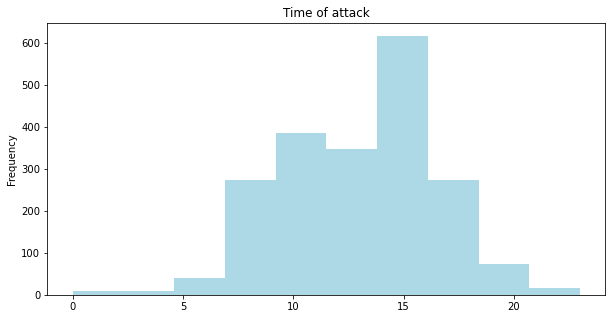

In [41]:
shark_df['Time'] = shark_df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)

# Get Lat and Long for each Location

In [42]:
shark_df["Lat"] = ''
shark_df["Lng"] = ''
url = 'https://maps.googleapis.com/maps/api/geocode/json?'
#apikey = '&key=' + gkey

In [43]:
# success = 0
# failure = 0
# for index, row in shark_df.iterrows():
#    try:
#        search_term = f'address={row["Location"]}'
#        response_status = requests.get(url+search_term+apikey)
#        response = response_status.json()
#        shark_df.at[index, 'Lat'] = response['results'][0]['geometry']['location']['lat']
#        shark_df.at[index, 'Lng'] = response['results'][0]['geometry']['location']['lng']
#        success = success + 1
#        print(f'Successful Request. {success} successes so far.')
#    except:
#        failure = failure + 1
#        print(f'Failed Request. {failure} failures so far.')
# print(f'Successes: {success}, Failures: {failure}')

# Age

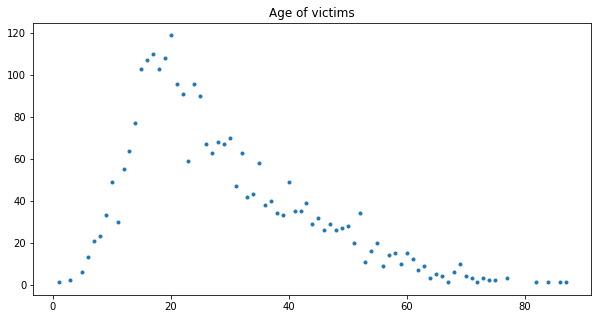

In [46]:
shark_df['Age'] = shark_df['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)

# Sex

In [48]:
shark_df["Sex"] = shark_df["Sex"].replace({"M ": "M"})

In [44]:
#shark_df.to_csv("data_files/clean_data.csv", index=False, header=True)